# ML with Python · Naive Bayes Classifier · NBA Players

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 09/08/2024

### Context

The task is to help NBA managers and coaches identify which players are most likely to thrive in the high-pressure environment of professional basketball and help the team be successful over time. To do this, a subset of data needs to be analyzed, that contains information about NBA players and their performance records. 

The first step is to conduct feature engineering to determine which features will most effectively predict whether a player's NBA career will last at least 5 years. The insights gained are to be used in building the predictive Naive Bayes Classification machine learning model.

### Data

The dataset is a file named `nba-players.csv`. It consists of performance records for a subset of NBA players.

### Execution

Imported Pandas and NumPy libraries for prior analysis.

In [13]:
import pandas as pd
import numpy as np

Loaded the dataset. Displayed the first 5 and last 5 rows, and the data size.

In [14]:
data = pd.read_csv("nba-players.csv")

data

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


Displayed all column names to get a sense of the kinds of metadata available about each player.

In [15]:
data.columns

Index(['gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p', 'ftm',
       'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

The following table was provisioned by the team, containing a description of the data in each column.

|Column Name|Column Description|
|:---|:-------|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

Displayed a summary of the data to get additional information about the DataFrame, including the types of data in the columns.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gp           1340 non-null   int64  
 1   min          1340 non-null   float64
 2   pts          1340 non-null   float64
 3   fgm          1340 non-null   float64
 4   fga          1340 non-null   float64
 5   fg           1340 non-null   float64
 6   3p_made      1340 non-null   float64
 7   3pa          1340 non-null   float64
 8   3p           1340 non-null   float64
 9   ftm          1340 non-null   float64
 10  fta          1340 non-null   float64
 11  ft           1340 non-null   float64
 12  oreb         1340 non-null   float64
 13  dreb         1340 non-null   float64
 14  reb          1340 non-null   float64
 15  ast          1340 non-null   float64
 16  stl          1340 non-null   float64
 17  blk          1340 non-null   float64
 18  tov          1340 non-null   float64
 19  target

Checked for missing values.

In [29]:
data.isnull().sum()

gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

To understand how balanced the dataset is in terms of classes, displayed the proportion of values that belong to each class in the target column named `target_5yrs`. As mentioned in metadata, a class value of `1` indicates an NBA career duration of at least 5 years, while class `0` indicates an NBA career duration of less than 5 years.

In [31]:
data.target_5yrs.value_counts(normalize = True)

target_5yrs
1    0.620149
0    0.379851
Name: proportion, dtype: float64

Identified features that will serve as useful predictors for the target variable `target_5yrs` with the following considerations:

* The number of games a player has played may not be as important in determining their career duration as the number of points they have earned. 
 

* On the other hand, `gp` and `pts` could be combined to get the total number of points earned across the games played, and that result could be a helpful feature.
 

* If the number of points earned across games will be extracted as a feature, then that could be accompanied with the number of minutes played across games (`min` * `gp`) to extract one more combined efficiency-measuring feature.

* The percent of field goals a player makes - `fg` - says more about their performance than the number of field goals they make - `fgm` - or the number of field goals they attempt - `fga`. The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made - `3p`, as well as the percent of free throws made - `ft`.

* Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature - means just `reb`.

* The number of assists - `ast`, steals - `stl`, blocks - `blk`, and turnovers - `tov` - provide information about how well players are performing in games, and thus, could be helpful in predicting how long players last in the league.

Therefore, it turned out to be most effective to select the following columns for the next step of feature engineering: `gp`, `min`, `pts`, `fg`, `3p`, `ft`, `reb`, `ast`, `stl`, `blk`, `tov`.

Selected the columns to proceed with. Made sure to include the target column, `target_5yrs`. Displayed the first few rows to confirm they are as expected.

In [32]:
selected_data = data[['gp', 'min', 'pts', 'fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs']]

selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


Extracted two features as was planned above: `total points` as `gp` * `pts` (indicating total number of points earned in all games) and `efficiency` as `total points` / `min` * `gp` (indicating number of points per minute played). Assigned the complete set of independent and newly extracted features to a new variable named `extracted_data`.

In [37]:
extracted_data = selected_data.copy()

extracted_data.insert(loc = 11, column = 'total points', value = extracted_data['gp'] * extracted_data['pts'])
extracted_data.insert(loc = 12, column = 'efficiency', value = 
                      extracted_data['total points'] / (extracted_data['min'] * extracted_data['gp']))

extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,total points,efficiency,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304,1


Removed the no-longer-independent columns which were used to extract new features.

In [40]:
extracted_data.drop(labels = extracted_data.columns[0:3], axis = 1, inplace = True)

extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,total points,efficiency,target_5yrs
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073,0
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658,0
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869,0
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379,1
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304,1


Displayed the data types of all set of selected features to ensure that they all are of the same type (in this case - continuous variables)

In [43]:
extracted_data.dtypes

fg              float64
3p              float64
ft              float64
reb             float64
ast             float64
stl             float64
blk             float64
tov             float64
total points    float64
efficiency      float64
target_5yrs       int64
dtype: object

Isolated target variable and features into the separate dataframes.

In [53]:
features = extracted_data.copy().drop(labels = 'target_5yrs', axis = 1)
target = extracted_data['target_5yrs']

Performed a split operation on data into a training set (75% of data) and test set (25% of data).

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, stratify = target)

Printed the shape of each output from train-test split data to verify that the split operated as expected.

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


Created and trained the Naive Bayes GaussianNB model type. Applied the model to predict on test data, obtained predicted values and assigned them to the variable `predictions`.

In [62]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

Used metrics to evaluate the model's performance: `accuracy`, `precision`, `recall` and `f1 score`.

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy:', accuracy_score(y_test, predictions))
print('precision:', precision_score(y_test, predictions))
print('recall:', recall_score(y_test, predictions))
print('f1 score:', f1_score(y_test, predictions)) 

accuracy: 0.6
precision: 0.7803030303030303
recall: 0.4951923076923077
f1 score: 0.6058823529411765


Obtained a bit more detailed performance report.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.48      0.77      0.59       127
           1       0.78      0.50      0.61       208

    accuracy                           0.60       335
   macro avg       0.63      0.63      0.60       335
weighted avg       0.67      0.60      0.60       335



Gained a greater clarity with the confusion matrix.

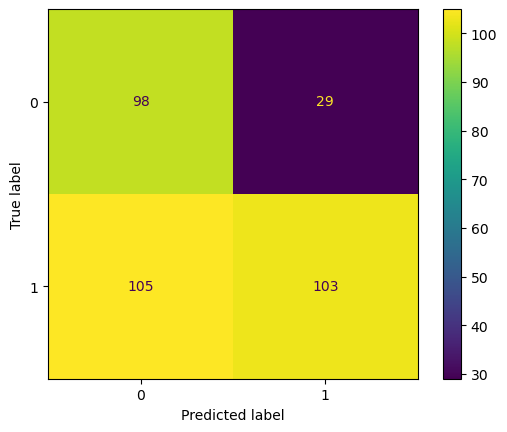

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm =  confusion_matrix(y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

Obtained the `AUC` metric for `ROC` curve of the model.

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.6334229254996971

And finally, checked the value of Matthew's Coefficient for the model.

In [70]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.2649469949337958

**Observations and Inferences:** 

- The accuracy score for this model is 60%, which is in either event more accurate classification than random guessing.

- According to precision and recall metrics, the model was correct in 78% cases of positive predicting while only 50% among predicted positives are really positive. From the other hand, the model succeeded in 48% cases of negative predicting, while 77% of predicted negatives are really negatives.

- Harmonic means of precision and recall (f1 score) of 61% for positives and 59% for negatives gives an average of 60.5% for the whole model, which is in general not high-performing, yet positive result.

- The amount of false positives is 3 times less than false negatives, so the main problem of the model is in «lack of faith in the players' abilities» which needs to be enhanced.

- Overall AUC score is 63% which corresponds to the accuracy score and shows the reasonable functionality of the model, meaning that model performs beter than random predicting in numerous probability thresholds.

- The Matthew's Coefficient value of 0.26 is above zero and confirms the reasonable performance as well, taking into account the slightly imbalanced classes occurance in data.

### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analyst Professional Certificate on Coursera.